In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] ='2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0],True)

In [2]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype("float32")/255.0   # normalize
x_test = x_test.astype("float32")/255.0     # normalize

CNN

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, 3, padding="valid", activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D((2,2)),

        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10),
    ]
)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.SGD(lr=0.02,momentum=0.001, name='SGD'),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=50, epochs=100, verbose=2,validation_data=(x_test,y_test))
#model.evaluate(x_test, y_test, batch_size=50, verbose=2)
%time

Epoch 1/100
1000/1000 - 13s - loss: 2.0555 - accuracy: 0.2428 - val_loss: 1.7815 - val_accuracy: 0.3569
Epoch 2/100
1000/1000 - 8s - loss: 1.6805 - accuracy: 0.3908 - val_loss: 1.5817 - val_accuracy: 0.4315
Epoch 3/100
1000/1000 - 8s - loss: 1.4903 - accuracy: 0.4619 - val_loss: 1.4303 - val_accuracy: 0.4873
Epoch 4/100
1000/1000 - 8s - loss: 1.3730 - accuracy: 0.5078 - val_loss: 1.3185 - val_accuracy: 0.5305
Epoch 5/100
1000/1000 - 8s - loss: 1.2818 - accuracy: 0.5457 - val_loss: 1.2467 - val_accuracy: 0.5580
Epoch 6/100
1000/1000 - 8s - loss: 1.2041 - accuracy: 0.5765 - val_loss: 1.1716 - val_accuracy: 0.5903
Epoch 7/100
1000/1000 - 8s - loss: 1.1420 - accuracy: 0.6000 - val_loss: 1.1090 - val_accuracy: 0.6079
Epoch 8/100
1000/1000 - 8s - loss: 1.0848 - accuracy: 0.6207 - val_loss: 1.1234 - val_accuracy: 0.6073
Epoch 9/100
1000/1000 - 8s - loss: 1.0367 - accuracy: 0.6363 - val_loss: 1.1027 - val_accuracy: 0.6123
Epoch 10/100
1000/1000 - 8s - loss: 0.9893 - accuracy: 0.6545 - val_loss

In [4]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [5]:
import numpy as np
import matplotlib.pyplot as plt

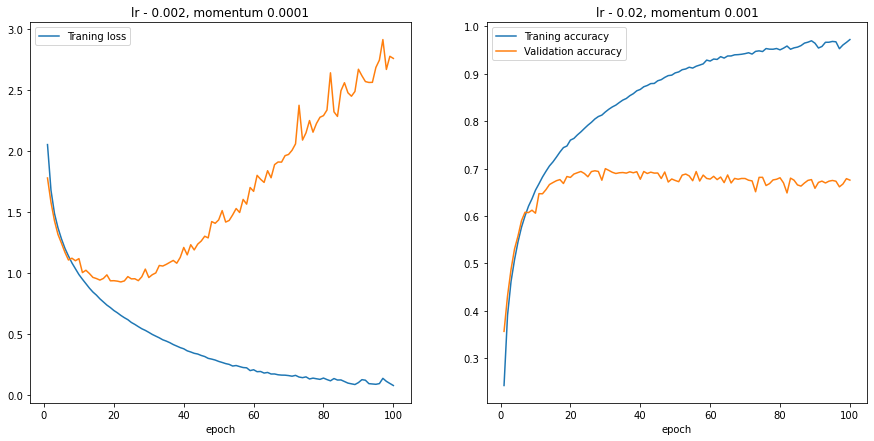

In [7]:
x_axis = np.arange(1,101,1)
fig, axes = plt.subplots(1,2,figsize=(15,7))
axes[0].plot(x_axis,history.history['loss'],label='Traning loss')
axes[0].legend()
axes[0].plot(x_axis,history.history['val_loss'],label='Validation loss')
axes[0].set_xlabel('epoch')
axes[0].set_title('lr - 0.002, momentum 0.0001')
axes[1].plot(x_axis,history.history['accuracy'],label='Traning accuracy')
axes[1].plot(x_axis,history.history['val_accuracy'],label='Validation accuracy')
axes[1].legend()
axes[1].set_xlabel('epoch')
axes[1].set_title('lr - 0.02, momentum 0.001')
plt.show()
